In [1]:
import pandas as pd
import scipy.io as sio
import numpy as np
from matplotlib import pyplot as plt
import seaborn
from IPython.core.display import display
%matplotlib inline

In [2]:
df = pd.read_pickle('../testData/scrobbles_test/10000933.pkl')
# Y1 = sio.loadmat('/Users/jaredlorince/Downloads/tSNE_matlab/{}.mat'.format('result_10000'))['result']
# Y1 = sio.loadmat('/Users/jaredlorince/Downloads/tSNE_matlab/{}.mat'.format('result_20k'))['result']
# Y2 = np.load('/Users/jaredlorince/Downloads/tsne_test_10000.npy')
Y3 = np.loadtxt('/Users/jaredlorince/git/lib/bhtsne/output_normed',delimiter='\t')

In [3]:
display(df.head())


,dist,artist_idx,ts,session,patch_idx_shuffle,block,patch_idx_simple
0,NaN,407.0,2008-03-29 18:17:31,0,0,0,0
1,0.760597,311.0,2008-03-29 18:19:52,0,0,1,1
2,0.995336,192.0,2008-03-29 18:30:05,0,0,2,2
3,0.928548,14.0,2008-03-29 18:34:47,0,0,3,3
4,0.801705,3067.0,2008-03-29 18:39:58,0,0,4,4


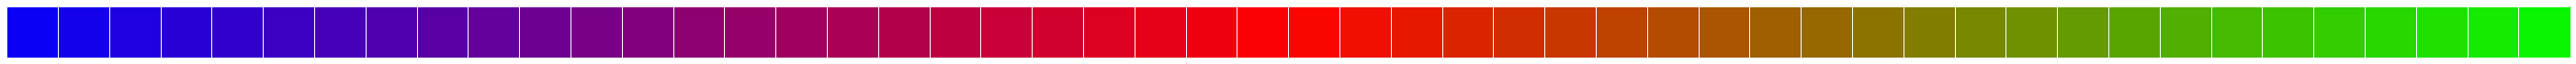

In [36]:
seaborn.palplot(seaborn.color_palette("brg",mx))

In [4]:
def srter(row):
    a,b = row['prev'],row['artist_idx'],
    if b<a:
        a = row['artist_idx']
        b = row['prev']
    return pd.Series({'a':a,'b':b})
df['prev'] = df['artist_idx'].shift(1)
df = pd.concat([df,df.apply(srter,axis=1)],axis=1)          
jumps = df.groupby(['a','b']).count()['block'].reset_index()
coords = pd.DataFrame(Y3).reindex(range(112312))
jumps = jumps.join(coords,on='a').join(coords,on='b',rsuffix='_prev')
jumps[jumps['a']!=jumps['b']]['block'].describe()
# colors = seaborn.color_palette("brg",mx)
# jumps['c'] = jumps.apply(lambda row: colors[int(row['block']-1)] if row['a'] != row['b'] else np.nan, axis=1)

count    5346.000000
mean        3.629630
std         8.762372
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       287.000000
Name: block, dtype: float64

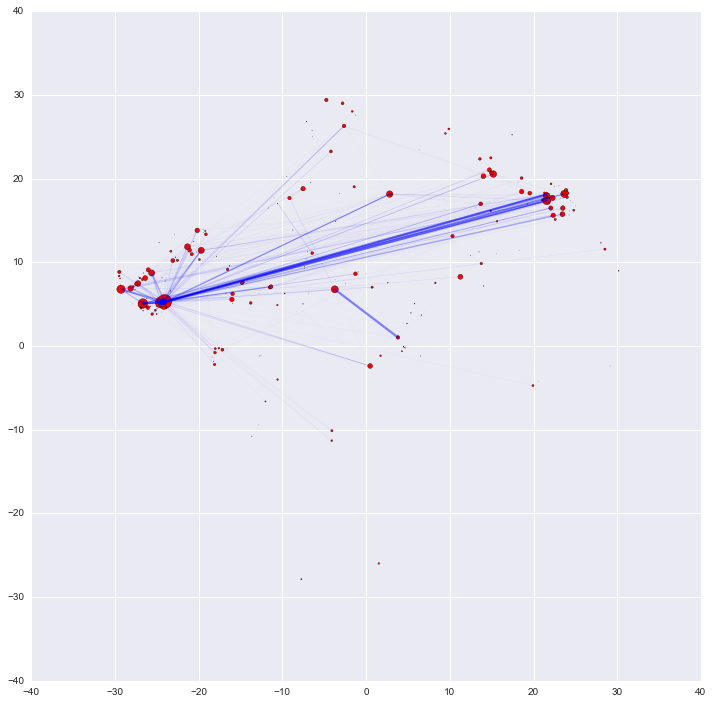

In [7]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
mx = jumps[jumps['a']!=jumps['b']]['block'].max()
for row in jumps.dropna().sort_values(by='block').iterrows():
    row = row[1]
    ax.plot([row['0_prev'],row['0']],[row['1_prev'],row['1']],c='blue',alpha=row['block']/float(mx),lw=5*(row['block']/float(mx)))
self_jumps = jumps[jumps['a']==jumps['b']]
self_jump_mx = self_jumps['block'].max()
ax.scatter(x=self_jumps['0'],y=self_jumps['1'],s=200*(self_jumps['block']/self_jump_mx),c='red')
# ax.set_xlim(-150,150);
# ax.set_ylim(-150,150);
#fig.savefig('/Users/jaredlorince/Desktop/test.pdf')

In [24]:
seaborn.kdeplot?

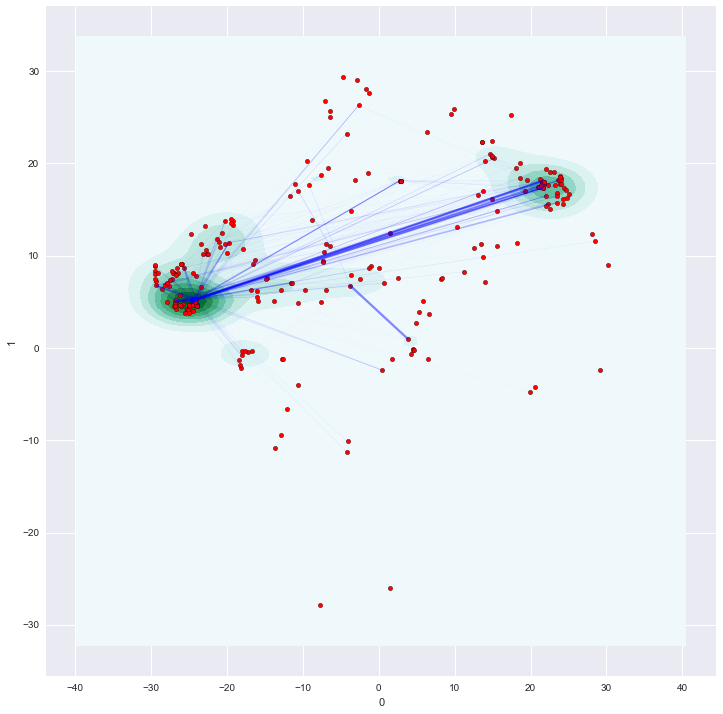

In [26]:
#jg = seaborn.jointplot(x='0',y='1',data=jumps,kind='kde')
#jg.ax_joint.scatter(x=self_jumps['0'],y=self_jumps['1'],s=200*(self_jumps['block']/self_jump_mx),c='red')
fig,ax = plt.subplots(1,1,figsize=(12,12))
seaborn.kdeplot(jumps['0'],jumps['1'],ax=ax,shade=True)
mx = jumps[jumps['a']!=jumps['b']]['block'].max()
for row in jumps.dropna().sort_values(by='block').iterrows():
    row = row[1]
    ax.plot([row['0_prev'],row['0']],[row['1_prev'],row['1']],c='blue',alpha=row['block']/float(mx),lw=5*(row['block']/float(mx)))
# self_jumps = jumps[jumps['a']==jumps['b']]
# self_jump_mx = self_jumps['block'].max()
#ax.scatter(x=self_jumps['0'],y=self_jumps['1'],s=200*(self_jumps['block']/self_jump_mx),c='red')
ax.scatter(x=self_jumps['0'],y=self_jumps['1'],s=20,c='red')
# ax.set_xlim(-150,150);
# ax.set_ylim(-150,150);
#fig.savefig('/Users/jaredlorince/Desktop/test.pdf')

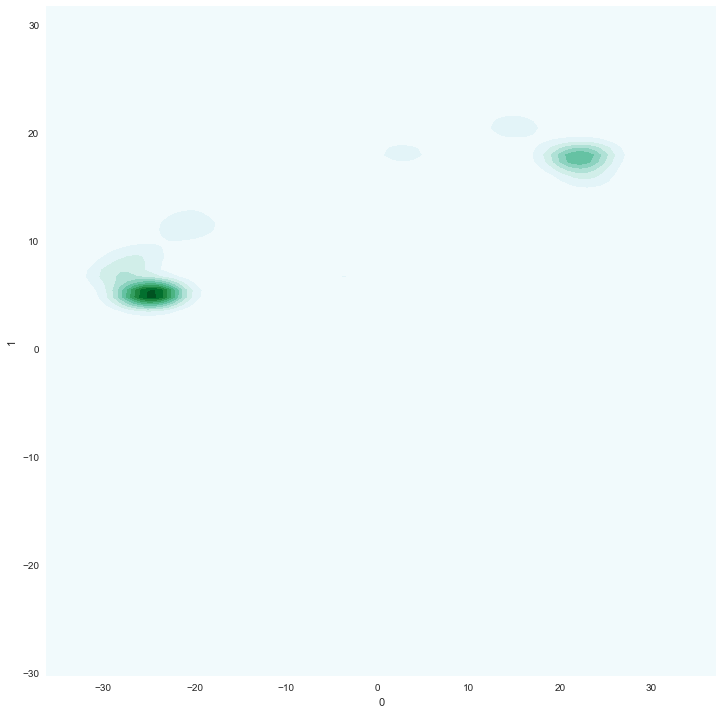

In [38]:
test = df.join(coords,on='artist_idx').dropna(subset=['artist_idx'])
fig,ax = plt.subplots(1,1,figsize=(12,12))
seaborn.kdeplot(test[0],test[1],shade=True,ax=ax)
